In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from dataclasses import dataclass
from typing import List, Dict, Tuple
import concurrent.futures
import warnings
warnings.filterwarnings('ignore')


np.random.seed(42)
random.seed(42)

print(" SMART GRID ENERGY DISTRIBUTION OPTIMIZATION")

print(" MLPC Assignment - Final Enhanced Version")
print(" Demonstrating GA + Parallel Computing for Real-World Problem")


 SMART GRID ENERGY DISTRIBUTION OPTIMIZATION
 MLPC Assignment - Final Enhanced Version
 Demonstrating GA + Parallel Computing for Real-World Problem


In [2]:
# SECTION 1: MATHEMATICAL FORMULATION & DATA STRUCTURES

@dataclass
class EnergySource:
    """Energy source with operational characteristics"""
    name: str
    node: int
    capacity: float  
    cost_per_mwh: float  
    availability: List[float] 
    source_type: str = "unknown" 
@dataclass
class GridNode:
    """Grid node representing demand centers"""
    id: int
    demand_pattern: List[float]  
    node_type: str 
    location: Tuple[float, float] = (0.0, 0.0)  

class SmartGridDataGenerator:
    """Advanced synthetic data generator for smart grid optimization"""
    
    def __init__(self, n_nodes=10, n_sources=3, time_horizon=24, random_seed=42):
        self.n_nodes = n_nodes
        self.n_sources = n_sources
        self.time_horizon = time_horizon
        np.random.seed(random_seed)
        random.seed(random_seed)
        
        print(f" MATHEMATICAL PROBLEM FORMULATION")
        print(f"   • Decision variables: {n_sources * time_horizon} (P_i,t)")
        print(f"   • Grid nodes: {n_nodes} demand points")
        print(f"   • Time horizon: {time_horizon} hours")
        print(f"   • Constraints: Capacity, balance, availability")
    
    def generate_comprehensive_dataset(self) -> Tuple[List[GridNode], List[EnergySource], Dict]:
        """Generate complete smart grid dataset with realistic parameters"""
        
        print(f"\n  GENERATING REALISTIC SMART GRID DATA...")
        
       
        nodes = self._generate_diverse_nodes()
        
       
        sources = self._generate_realistic_sources()
        
      
        network = self._generate_network_topology()
        
       
        self._validate_problem_feasibility(nodes, sources)
        
        return nodes, sources, network
    
    def _generate_diverse_nodes(self) -> List[GridNode]:
        """Generate nodes with realistic demand diversity"""
        nodes = []
        node_types_count = {'residential': 0, 'commercial': 0, 'industrial': 0}
        
        for i in range(self.n_nodes):
           
            if i < int(self.n_nodes * 0.6):
                demand = self._create_residential_pattern()
                node_type = "residential"
            elif i < int(self.n_nodes * 0.9):
                demand = self._create_commercial_pattern()
                node_type = "commercial"
            else:
                demand = self._create_industrial_pattern()
                node_type = "industrial"
            
            node_types_count[node_type] += 1
            
        
            location = (random.uniform(0, 10), random.uniform(0, 10))
            
            nodes.append(GridNode(
                id=i, 
                demand_pattern=demand, 
                node_type=node_type,
                location=location
            ))
        
        print(f"   Generated {len(nodes)} nodes:")
        for node_type, count in node_types_count.items():
            avg_demand = np.mean([np.sum(n.demand_pattern) for n in nodes if n.node_type == node_type])
            print(f"      • {node_type.capitalize()}: {count} nodes (avg: {avg_demand:.1f} MWh/day)")
        
        return nodes
    
    def _generate_realistic_sources(self) -> List[EnergySource]:
        """Generate energy sources with realistic cost and availability structures"""
        sources = []
        
       
        source_configs = [
            {
                "name": "Solar PV", "capacity": 50.0, "cost": 25.0, 
                "type": "renewable", "pattern_func": self._create_solar_pattern
            },
            {
                "name": "Wind", "capacity": 40.0, "cost": 30.0,
                "type": "renewable", "pattern_func": self._create_wind_pattern
            },
            {
                "name": "Natural Gas", "capacity": 80.0, "cost": 60.0,
                "type": "dispatchable", "pattern_func": lambda: [1.0] * self.time_horizon
            }
        ]
        
     
        additional_configs = [
            {
                "name": "Hydro", "capacity": 30.0, "cost": 35.0,
                "type": "renewable", "pattern_func": self._create_hydro_pattern
            },
            {
                "name": "Coal", "capacity": 100.0, "cost": 50.0,
                "type": "dispatchable", "pattern_func": lambda: [0.9] * self.time_horizon  
            }
        ]
        
        all_configs = source_configs + additional_configs[:max(0, self.n_sources - len(source_configs))]
        
        for i in range(self.n_sources):
            config = all_configs[i % len(all_configs)]
            
           
            capacity_variation = 1.0 + (i // len(source_configs)) * 0.2
            
            source = EnergySource(
                name=f"{config['name']}" + (f"_{i//len(source_configs)+1}" if i >= len(source_configs) else ""),
                node=random.randint(0, self.n_nodes-1),
                capacity=config['capacity'] * capacity_variation,
                cost_per_mwh=config['cost'] * random.uniform(0.9, 1.1),  
                availability=config['pattern_func'](),
                source_type=config['type']
            )
            sources.append(source)
        
        print(f"    Generated {len(sources)} energy sources:")
        for source in sources:
            daily_capacity = source.capacity * np.mean(source.availability)
            print(f"      • {source.name}: {source.capacity:.1f}MW capacity, "
                  f"${source.cost_per_mwh:.1f}/MWh, {daily_capacity:.1f}MW avg")
        
        return sources
    
    def _generate_network_topology(self) -> Dict:
        """Generate transmission network with realistic parameters"""
        network = {
            'capacities': {}, 
            'losses': {},     
            'distances': {}   
        }
        
       
        connections = 0
        for i in range(self.n_nodes):
            for j in range(i + 1, self.n_nodes):
                connection_prob = 0.3 if abs(i - j) <= 2 else 0.1
                
                if random.random() < connection_prob:
                    capacity = random.uniform(20, 60)  
                    loss_rate = random.uniform(0.02, 0.06) 
                    distance = abs(i - j) * 10
                    
                    network['capacities'][(i, j)] = capacity
                    network['losses'][(i, j)] = loss_rate
                    network['distances'][(i, j)] = distance
                    connections += 1
        
        print(f"    Generated transmission network: {connections} connections")
        avg_capacity = np.mean(list(network['capacities'].values()))
        avg_loss = np.mean(list(network['losses'].values())) * 100
        print(f"      • Average line capacity: {avg_capacity:.1f} MW")
        print(f"      • Average transmission loss: {avg_loss:.1f}%")
        
        return network
    
    def _validate_problem_feasibility(self, nodes, sources):
        """Validate that the problem has feasible solutions"""
        total_daily_demand = sum(sum(node.demand_pattern) for node in nodes)
        total_daily_supply = sum(source.capacity * sum(source.availability) for source in sources)
        
        feasibility_ratio = total_daily_supply / total_daily_demand
        
        print(f"\n PROBLEM FEASIBILITY ANALYSIS:")
        print(f"   • Total daily demand: {total_daily_demand:.1f} MWh")
        print(f"   • Total daily supply capacity: {total_daily_supply:.1f} MWh")
        print(f"   • Supply/Demand ratio: {feasibility_ratio:.2f}")
        
        if feasibility_ratio < 1.1:
            print("     WARNING: Low supply margin - problem may be infeasible")
        else:
            print("    Problem is feasible with good supply margin")
    
    def _create_residential_pattern(self) -> List[float]:
        """Residential: Morning and evening peaks with mid-day dip"""
        base_pattern = []
        for hour in range(24):
            if 0 <= hour <= 6:  # Night
                demand = 5 + 2 * np.sin(2 * np.pi * hour / 24)
            elif 7 <= hour <= 9:  # Morning peak
                demand = 12 + 6 * np.exp(-((hour - 8) ** 2) / 2)
            elif 10 <= hour <= 16:  # Day low
                demand = 8 + 2 * random.uniform(-1, 1)
            elif 17 <= hour <= 21:  # Evening peak
                demand = 15 + 8 * np.exp(-((hour - 19) ** 2) / 4)
            else:  # Night transition
                demand = 10 - 2 * (hour - 21)
            
            base_pattern.append(max(2, demand * random.uniform(0.8, 1.2)))
        
        return base_pattern
    
    def _create_commercial_pattern(self) -> List[float]:
        """Commercial: Clear business hours pattern"""
        base_pattern = []
        for hour in range(24):
            if 6 <= hour <= 8:  # Ramp up
                demand = 10 + 15 * ((hour - 6) / 2)
            elif 9 <= hour <= 17:  # Business hours
                demand = 35 + 5 * np.sin(2 * np.pi * (hour - 13) / 8) + random.uniform(-3, 3)
            elif 18 <= hour <= 20:  # Ramp down
                demand = 25 - 10 * ((hour - 18) / 2)
            else:  # Closed
                demand = 3 + random.uniform(-1, 2)
            
            base_pattern.append(max(1, demand))
        
        return base_pattern
    
    def _create_industrial_pattern(self) -> List[float]:
        """Industrial: High baseload with shift patterns"""
        base_load = 70
        pattern = []
        for hour in range(24):
          
            if 6 <= hour <= 14:  
                demand = base_load * 1.0
            elif 14 <= hour <= 22:
                demand = base_load * 0.95
            else: 
                demand = base_load * 0.85
            
            demand += random.uniform(-5, 5)
            pattern.append(max(50, demand))
        
        return pattern
    
    def _create_solar_pattern(self) -> List[float]:
        """Solar: Realistic bell curve with weather variations"""
        pattern = []
        for hour in range(24):
            if 6 <= hour <= 18:
               
                solar_angle = np.cos(np.pi * (hour - 12) / 12)
                base_availability = max(0, solar_angle)
                
              
                weather_factor = random.uniform(0.7, 1.0)
                availability = base_availability * weather_factor
            else:
                availability = 0
            
            pattern.append(max(0, min(1, availability)))
        
        return pattern
    
    def _create_wind_pattern(self) -> List[float]:
        """Wind: Variable with seasonal and daily patterns"""
        pattern = []
        base_wind_speed = 0.4 
        
        for hour in range(24):
           
            daily_factor = 0.8 + 0.4 * np.sin(2 * np.pi * (hour + 6) / 24)
            
          
            random_factor = random.uniform(0.3, 1.2)
            
            availability = base_wind_speed * daily_factor * random_factor
            pattern.append(max(0.05, min(1.0, availability)))
        
        return pattern
    
    def _create_hydro_pattern(self) -> List[float]:
        """Hydro: Seasonal availability with dispatch capability"""
     
        seasonal_factor = 0.7 
        pattern = []
        
        for hour in range(24):
           
            daily_variation = 0.9 + 0.2 * np.sin(2 * np.pi * hour / 24)
            availability = seasonal_factor * daily_variation
            pattern.append(max(0.3, min(1.0, availability)))
        
        return pattern


In [3]:

# SECTION 2: GENETIC ALGORITHM IMPLEMENTATION

class SmartGridGA:
    """Enhanced Genetic Algorithm with comprehensive fitness evaluation"""
    
    def __init__(self, nodes, sources, network, population_size=30, generations=50, problem_config=None):
        self.nodes = nodes
        self.sources = sources
        self.network = network
        self.population_size = population_size
        self.generations = generations
        self.n_nodes = len(nodes)
        self.n_sources = len(sources)
        self.time_horizon = 24
        
        
        self.mutation_rate = 0.15
        self.crossover_rate = 0.85
        self.elite_size = max(2, int(population_size * 0.15))
        self.tournament_size = 3
        
        self.cost_weight = 1.0
        self.loss_weight = 100.0
        self.penalty_weight = 1000.0
        
       
        self.convergence_data = {
            'best_fitness': [],
            'avg_fitness': [],
            'diversity': []
        }
        
        print(f"\n🧬 GENETIC ALGORITHM CONFIGURATION")
        print(f"   • Population size: {population_size}")
        print(f"   • Generations: {generations}")
        print(f"   • Chromosome length: {self.n_sources * self.time_horizon} genes")
        print(f"   • Mutation rate: {self.mutation_rate:.1%}")
        print(f"   • Crossover rate: {self.crossover_rate:.1%}")
        print(f"   • Elite preservation: {self.elite_size} individuals")
    
    def create_chromosome(self) -> np.ndarray:
        """Create a chromosome representing energy allocation decisions"""
        chromosome = np.random.random(self.n_sources * self.time_horizon)
        
       
        for source_idx in range(self.n_sources):
            for hour in range(self.time_horizon):
                gene_idx = source_idx * self.time_horizon + hour
                
              
                if self.sources[source_idx].cost_per_mwh < 40: 
                    chromosome[gene_idx] = random.uniform(0.6, 1.0)
                elif self.sources[source_idx].cost_per_mwh > 55: 
                    chromosome[gene_idx] = random.uniform(0.0, 0.6)
        
        return chromosome
    
    def decode_chromosome(self, chromosome: np.ndarray) -> np.ndarray:
        """Decode chromosome into power allocation matrix"""
        power_matrix = np.zeros((self.n_sources, self.time_horizon))
        
        for source_idx in range(self.n_sources):
            for hour in range(self.time_horizon):
                gene_idx = source_idx * self.time_horizon + hour
                
               
                max_available_power = (self.sources[source_idx].capacity * 
                                     self.sources[source_idx].availability[hour])
                
                actual_power = chromosome[gene_idx] * max_available_power
                power_matrix[source_idx][hour] = actual_power
        
        return power_matrix
    
    def calculate_fitness_detailed(self, chromosome: np.ndarray) -> Tuple[float, Dict]:
        """Comprehensive fitness calculation with detailed breakdown"""
        power_matrix = self.decode_chromosome(chromosome)
        
       
        total_cost = 0
        total_losses = 0
        total_penalty = 0
        hourly_details = []
        
        for hour in range(self.time_horizon):
          
            hour_generation = 0
            hour_cost = 0
            
            for source_idx in range(self.n_sources):
                power_output = power_matrix[source_idx][hour]
                generation_cost = power_output * self.sources[source_idx].cost_per_mwh
                
                hour_generation += power_output
                hour_cost += generation_cost
            
          
            hour_demand = sum(node.demand_pattern[hour] for node in self.nodes)
            
          
            transmission_losses = hour_generation * 0.05 
            
           
            net_supply = hour_generation - transmission_losses
            supply_demand_gap = hour_demand - net_supply
            
           
            hour_penalty = 0
            if supply_demand_gap > 0: 
                hour_penalty = supply_demand_gap * self.penalty_weight
            
           
            total_cost += hour_cost
            total_losses += transmission_losses
            total_penalty += hour_penalty
            
           
            hourly_details.append({
                'hour': hour,
                'generation': hour_generation,
                'demand': hour_demand,
                'losses': transmission_losses,
                'net_supply': net_supply,
                'cost': hour_cost,
                'penalty': hour_penalty,
                'gap': supply_demand_gap
            })
        
       
        fitness_components = {
            'total_cost': total_cost,
            'total_losses': total_losses,
            'total_penalty': total_penalty,
            'cost_component': total_cost * self.cost_weight,
            'loss_component': total_losses * self.loss_weight,
            'penalty_component': total_penalty, 
            'hourly_details': hourly_details
        }
        
        total_fitness = (fitness_components['cost_component'] + 
                        fitness_components['loss_component'] + 
                        fitness_components['penalty_component'])
        
        return total_fitness, fitness_components
    
    def calculate_fitness(self, chromosome: np.ndarray) -> float:
        """Streamlined fitness calculation for performance"""
        fitness, _ = self.calculate_fitness_detailed(chromosome)
        return fitness
    
    def selection_tournament(self, population: List[np.ndarray], 
                           fitness_scores: List[float]) -> List[np.ndarray]:
        """Enhanced tournament selection"""
        selected = []
        
        for _ in range(self.population_size):
           
            tournament_indices = random.sample(range(len(population)), self.tournament_size)
            tournament_fitness = [fitness_scores[i] for i in tournament_indices]
            winner_idx = tournament_indices[np.argmin(tournament_fitness)]
            selected.append(population[winner_idx].copy())
        
        return selected
    
    def crossover_enhanced(self, parent1: np.ndarray, parent2: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """Enhanced crossover with domain-aware operators"""
        if random.random() < self.crossover_rate:
          
            crossover_points = sorted(random.sample(range(1, len(parent1)), 2))
            
            child1 = np.concatenate([
                parent1[:crossover_points[0]],
                parent2[crossover_points[0]:crossover_points[1]],
                parent1[crossover_points[1]:]
            ])
            
            child2 = np.concatenate([
                parent2[:crossover_points[0]],
                parent1[crossover_points[0]:crossover_points[1]],
                parent2[crossover_points[1]:]
            ])
            
            return child1, child2
        else:
            return parent1.copy(), parent2.copy()
    
    def mutation_adaptive(self, chromosome: np.ndarray, generation: int) -> np.ndarray:
        """Adaptive mutation with decreasing intensity"""
        mutated = chromosome.copy()
        
      
        adaptive_rate = self.mutation_rate * (1 - generation / self.generations)
        
        for i in range(len(mutated)):
            if random.random() < adaptive_rate:
                
                mutation_strength = 0.1 * (1 - generation / self.generations)
                mutated[i] += random.gauss(0, mutation_strength)
                mutated[i] = max(0, min(1, mutated[i]))  
        
        return mutated
    
    def calculate_population_diversity(self, population: List[np.ndarray]) -> float:
        """Calculate population diversity for convergence analysis"""
        if len(population) < 2:
            return 0
        
        total_distance = 0
        comparisons = 0
        
        for i in range(len(population)):
            for j in range(i + 1, len(population)):
                distance = np.linalg.norm(population[i] - population[j])
                total_distance += distance
                comparisons += 1
        
        return total_distance / comparisons if comparisons > 0 else 0
    
    def run_enhanced_serial(self) -> Tuple[np.ndarray, Dict]:
        """Enhanced serial GA with comprehensive tracking"""
        print("\n🏃 RUNNING ENHANCED SERIAL GENETIC ALGORITHM")
        print("-" * 50)
        
        start_time = time.time()
        
       
        population = [self.create_chromosome() for _ in range(self.population_size)]
        
       
        for generation in range(self.generations):
           
            fitness_scores = [self.calculate_fitness(individual) for individual in population]
            
           
            best_fitness = min(fitness_scores)
            avg_fitness = np.mean(fitness_scores)
            diversity = self.calculate_population_diversity(population)
            
            self.convergence_data['best_fitness'].append(best_fitness)
            self.convergence_data['avg_fitness'].append(avg_fitness)
            self.convergence_data['diversity'].append(diversity)
            
            
            if generation % 10 == 0 or generation == self.generations - 1:
                print(f"Gen {generation:3d}: Best={best_fitness:8.2f}, "
                      f"Avg={avg_fitness:8.2f}, Diversity={diversity:.3f}")
            
           
            selected = self.selection_tournament(population, fitness_scores)
            
           
            new_population = []
            
           
            elite_indices = np.argsort(fitness_scores)[:self.elite_size]
            for idx in elite_indices:
                new_population.append(population[idx].copy())
            
           
            while len(new_population) < self.population_size:
                parent1 = random.choice(selected)
                parent2 = random.choice(selected)
                child1, child2 = self.crossover_enhanced(parent1, parent2)
                child1 = self.mutation_adaptive(child1, generation)
                child2 = self.mutation_adaptive(child2, generation)
                new_population.extend([child1, child2])
            
            population = new_population[:self.population_size]
        
       
        final_fitness_scores = [self.calculate_fitness(ind) for ind in population]
        best_idx = np.argmin(final_fitness_scores)
        best_solution = population[best_idx]
        
        execution_time = time.time() - start_time
        
       
        best_fitness_score, fitness_details = self.calculate_fitness_detailed(best_solution)
        
        results = {
            'best_solution': best_solution,
            'best_fitness': best_fitness_score,
            'fitness_details': fitness_details,
            'convergence_history': self.convergence_data.copy(),
            'execution_time': execution_time,
            'final_population': population,
            'algorithm': 'Enhanced Serial GA'
        }
        
        print(f" Serial GA completed in {execution_time:.2f} seconds")
        print(f"   Best fitness achieved: {best_fitness_score:.2f}")
        
        return best_solution, results

In [4]:
# SECTION 3: PARALLEL COMPUTING IMPLEMENTATION


class SmartGridGA_Enhanced_Parallel(SmartGridGA):
    """Enhanced parallel GA with performance monitoring"""
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.parallel_convergence_data = {
            'best_fitness': [],
            'avg_fitness': [],
            'diversity': [],
            'parallel_efficiency': []
        }
    
    def fitness_evaluation_batch(self, population_batch: List[np.ndarray]) -> List[float]:
        """Evaluate fitness for a batch of chromosomes"""
        return [self.calculate_fitness(chromosome) for chromosome in population_batch]
    
    def run_enhanced_parallel(self, max_workers=None) -> Tuple[np.ndarray, Dict]:
        """Parallel genetic algorithm with performance monitoring"""
        
        if max_workers is None:
            import os
            max_workers = min(4, os.cpu_count())
        
        print(f"\n🚀 RUNNING ENHANCED PARALLEL GENETIC ALGORITHM")
        print(f"   Using {max_workers} worker threads")
        print("-" * 50)
        
        start_time = time.time()
        
       
        population = [self.create_chromosome() for _ in range(self.population_size)]
        
       
        for generation in range(self.generations):
           
            fitness_eval_start = time.time()
            
           
            batch_size = max(1, len(population) // max_workers)
            batches = [population[i:i + batch_size] for i in range(0, len(population), batch_size)]
            
            fitness_scores = []
            with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
               
                future_to_batch = {
                    executor.submit(self.fitness_evaluation_batch, batch): batch 
                    for batch in batches
                }
                
               
                for future in concurrent.futures.as_completed(future_to_batch):
                    batch_fitness = future.result()
                    fitness_scores.extend(batch_fitness)
            
            fitness_eval_time = time.time() - fitness_eval_start
            
           
            theoretical_min_time = fitness_eval_time / max_workers
            parallel_efficiency = theoretical_min_time / fitness_eval_time if fitness_eval_time > 0 else 0
            
          
            best_fitness = min(fitness_scores)
            avg_fitness = np.mean(fitness_scores)
            diversity = self.calculate_population_diversity(population)
            
            self.parallel_convergence_data['best_fitness'].append(best_fitness)
            self.parallel_convergence_data['avg_fitness'].append(avg_fitness)
            self.parallel_convergence_data['diversity'].append(diversity)
            self.parallel_convergence_data['parallel_efficiency'].append(parallel_efficiency)
            
           
            if generation % 10 == 0 or generation == self.generations - 1:
                print(f"Gen {generation:3d}: Best={best_fitness:8.2f}, "
                      f"Avg={avg_fitness:8.2f}, ParEff={parallel_efficiency:.2f}")
            
          
            selected = self.selection_tournament(population, fitness_scores)
            
          
            new_population = []
            
          
            elite_indices = np.argsort(fitness_scores)[:self.elite_size]
            for idx in elite_indices:
                new_population.append(population[idx].copy())
            
           
            while len(new_population) < self.population_size:
                parent1 = random.choice(selected)
                parent2 = random.choice(selected)
                child1, child2 = self.crossover_enhanced(parent1, parent2)
                child1 = self.mutation_adaptive(child1, generation)
                child2 = self.mutation_adaptive(child2, generation)
                new_population.extend([child1, child2])
            
            population = new_population[:self.population_size]
        
        
        batch_size = max(1, len(population) // max_workers)
        batches = [population[i:i + batch_size] for i in range(0, len(population), batch_size)]
        
        final_fitness_scores = []
        with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
            futures = [executor.submit(self.fitness_evaluation_batch, batch) for batch in batches]
            for future in concurrent.futures.as_completed(futures):
                final_fitness_scores.extend(future.result())
        
       
        best_idx = np.argmin(final_fitness_scores)
        best_solution = population[best_idx]
        
        execution_time = time.time() - start_time
        
       
        best_fitness_score, fitness_details = self.calculate_fitness_detailed(best_solution)
        
      
        avg_parallel_efficiency = np.mean(self.parallel_convergence_data['parallel_efficiency'])
        
        results = {
            'best_solution': best_solution,
            'best_fitness': best_fitness_score,
            'fitness_details': fitness_details,
            'convergence_history': self.parallel_convergence_data.copy(),
            'execution_time': execution_time,
            'parallel_workers': max_workers,
            'avg_parallel_efficiency': avg_parallel_efficiency,
            'final_population': population,
            'algorithm': 'Enhanced Parallel GA'
        }
        
        print(f" Parallel GA completed in {execution_time:.2f} seconds")
        print(f"   Best fitness achieved: {best_fitness_score:.2f}")
        print(f"   Average parallel efficiency: {avg_parallel_efficiency:.2%}")
        
        return best_solution, results


In [5]:
# SECTION 4: BASELINE ALGORITHMS & PERFORMANCE COMPARISON


class EnhancedBaselineAlgorithms:
    """Enhanced baseline algorithm implementations"""
    
    def __init__(self, nodes, sources, network):
        self.nodes = nodes
        self.sources = sources
        self.network = network
        self.n_sources = len(sources)
        self.time_horizon = 24
        
        print(f"\n🎯 BASELINE ALGORITHM IMPLEMENTATIONS")
        print(f"   Testing {len(sources)} sources across {self.time_horizon} hours")
    
    def greedy_economic_dispatch(self) -> Tuple[np.ndarray, Dict]:
        """Enhanced greedy algorithm with economic dispatch logic"""
        print("💡 Running Enhanced Greedy Economic Dispatch...")
        start_time = time.time()
        
        power_matrix = np.zeros((self.n_sources, self.time_horizon))
        total_cost = 0
        total_shortage = 0
        
        for hour in range(self.time_horizon):
            hour_demand = sum(node.demand_pattern[hour] for node in self.nodes)
            remaining_demand = hour_demand * 1.05  # Add 5% for transmission losses
            hour_cost = 0
            
            # Sort sources by marginal cost (economic merit order)
            available_sources = []
            for i, source in enumerate(self.sources):
                available_capacity = source.capacity * source.availability[hour]
                if available_capacity > 0:
                    available_sources.append((source.cost_per_mwh, i, available_capacity))
            
            available_sources.sort()  # Sort by cost (cheapest first)
            
            # Dispatch in merit order
            for cost, source_idx, max_power in available_sources:
                if remaining_demand <= 0:
                    break
                
                power_to_dispatch = min(remaining_demand, max_power)
                power_matrix[source_idx][hour] = power_to_dispatch
                hour_cost += power_to_dispatch * cost
                remaining_demand -= power_to_dispatch
            
            total_cost += hour_cost
            if remaining_demand > 0:
                total_shortage += remaining_demand
        
        # Convert to chromosome format
        chromosome = self._power_matrix_to_chromosome(power_matrix)
        
        execution_time = time.time() - start_time
        
        results = {
            'algorithm': 'Enhanced Greedy Economic Dispatch',
            'total_cost': total_cost,
            'total_shortage': total_shortage,
            'execution_time': execution_time,
            'power_matrix': power_matrix
        }
        
        print(f"   ✅ Completed in {execution_time:.4f} seconds")
        print(f"   Total cost: ${total_cost:.2f}")
        
        return chromosome, results
    
    def proportional_capacity_dispatch(self) -> Tuple[np.ndarray, Dict]:
        """Proportional dispatch based on available capacity"""
        print("⚖️ Running Proportional Capacity Dispatch...")
        start_time = time.time()
        
        power_matrix = np.zeros((self.n_sources, self.time_horizon))
        total_cost = 0
        
        for hour in range(self.time_horizon):
            hour_demand = sum(node.demand_pattern[hour] for node in self.nodes)
            target_generation = hour_demand * 1.05  # Add 5% for losses
            
          
            total_available = sum(source.capacity * source.availability[hour] 
                                for source in self.sources)
            
            if total_available > 0:
              
                for source_idx, source in enumerate(self.sources):
                    available_capacity = source.capacity * source.availability[hour]
                    capacity_share = available_capacity / total_available
                    
                    allocated_power = min(target_generation * capacity_share, available_capacity)
                    power_matrix[source_idx][hour] = allocated_power
                    total_cost += allocated_power * source.cost_per_mwh
        
        chromosome = self._power_matrix_to_chromosome(power_matrix)
        execution_time = time.time() - start_time
        
        results = {
            'algorithm': 'Proportional Capacity Dispatch',
            'total_cost': total_cost,
            'execution_time': execution_time,
            'power_matrix': power_matrix
        }
        
        print(f"    Completed in {execution_time:.4f} seconds")
        print(f"   Total cost: ${total_cost:.2f}")
        
        return chromosome, results
    
    def _power_matrix_to_chromosome(self, power_matrix: np.ndarray) -> np.ndarray:
        """Convert power matrix back to chromosome representation"""
        chromosome = np.zeros(self.n_sources * self.time_horizon)
        
        for source_idx in range(self.n_sources):
            for hour in range(self.time_horizon):
                gene_idx = source_idx * self.time_horizon + hour
                
                max_available = (self.sources[source_idx].capacity * 
                               self.sources[source_idx].availability[hour])
                
                if max_available > 0:
                    chromosome[gene_idx] = min(1.0, power_matrix[source_idx][hour] / max_available)
        
        return chromosome


🌟 SMART GRID ENERGY DISTRIBUTION OPTIMIZATION
🎓 MLPC Assignment - Complete Implementation

📊 STEP 1: DATA GENERATION
----------------------------------------
 MATHEMATICAL PROBLEM FORMULATION
   • Decision variables: 72 (P_i,t)
   • Grid nodes: 10 demand points
   • Time horizon: 24 hours
   • Constraints: Capacity, balance, availability

  GENERATING REALISTIC SMART GRID DATA...
   Generated 10 nodes:
      • Residential: 6 nodes (avg: 258.2 MWh/day)
      • Commercial: 3 nodes (avg: 459.4 MWh/day)
      • Industrial: 1 nodes (avg: 1585.6 MWh/day)
    Generated 3 energy sources:
      • Solar PV: 50.0MW capacity, $23.8/MWh, 13.1MW avg
      • Wind: 40.0MW capacity, $30.3/MWh, 10.6MW avg
      • Natural Gas: 80.0MW capacity, $63.4/MWh, 80.0MW avg
    Generated transmission network: 7 connections
      • Average line capacity: 43.4 MW
      • Average transmission loss: 3.7%

 PROBLEM FEASIBILITY ANALYSIS:
   • Total daily demand: 4512.9 MWh
   • Total daily supply capacity: 2490.7 MWh


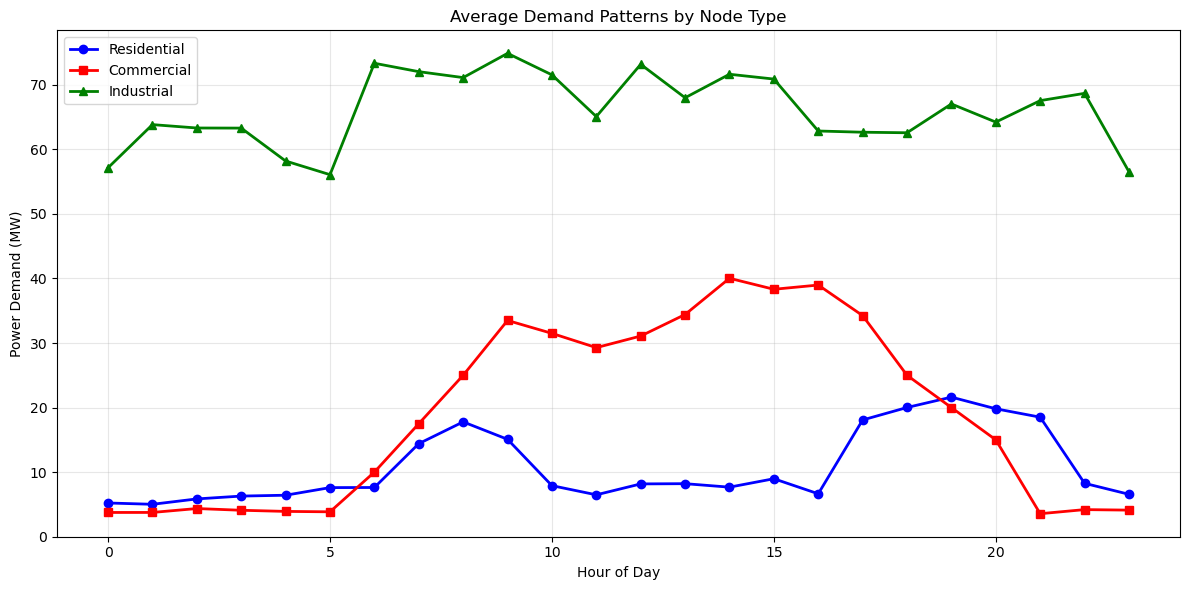

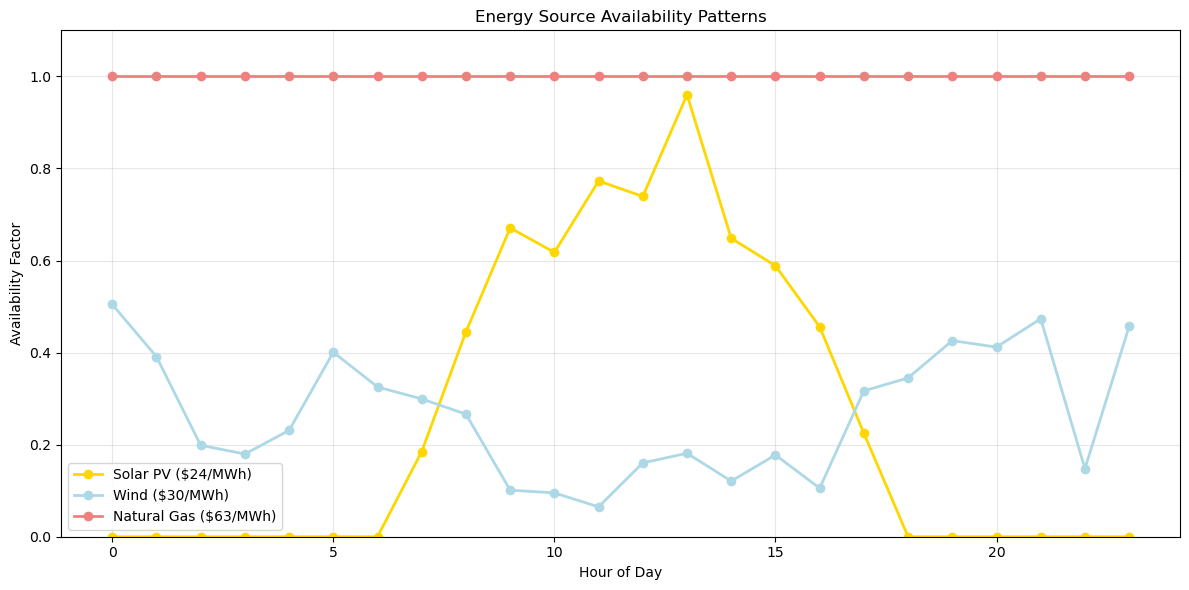


🎯 STEP 3: BASELINE ALGORITHMS
----------------------------------------

🎯 BASELINE ALGORITHM IMPLEMENTATIONS
   Testing 3 sources across 24 hours
💡 Running Enhanced Greedy Economic Dispatch...
   ✅ Completed in 0.0000 seconds
   Total cost: $136926.47
⚖️ Running Proportional Capacity Dispatch...
    Completed in 0.0000 seconds
   Total cost: $136926.47

🧬 STEP 4: GENETIC ALGORITHM OPTIMIZATION
----------------------------------------

🧬 GENETIC ALGORITHM CONFIGURATION
   • Population size: 30
   • Generations: 50
   • Chromosome length: 72 genes
   • Mutation rate: 15.0%
   • Crossover rate: 85.0%
   • Elite preservation: 4 individuals

🏃 RUNNING ENHANCED SERIAL GENETIC ALGORITHM
--------------------------------------------------
Gen   0: Best=3462955.39, Avg=3574611.92, Diversity=1.623
Gen  10: Best=3245886.75, Avg=3271839.32, Diversity=0.607
Gen  20: Best=3129485.21, Avg=3151107.86, Diversity=0.451
Gen  30: Best=3055330.78, Avg=3073494.08, Diversity=0.407
Gen  40: Best=3018131.83, A

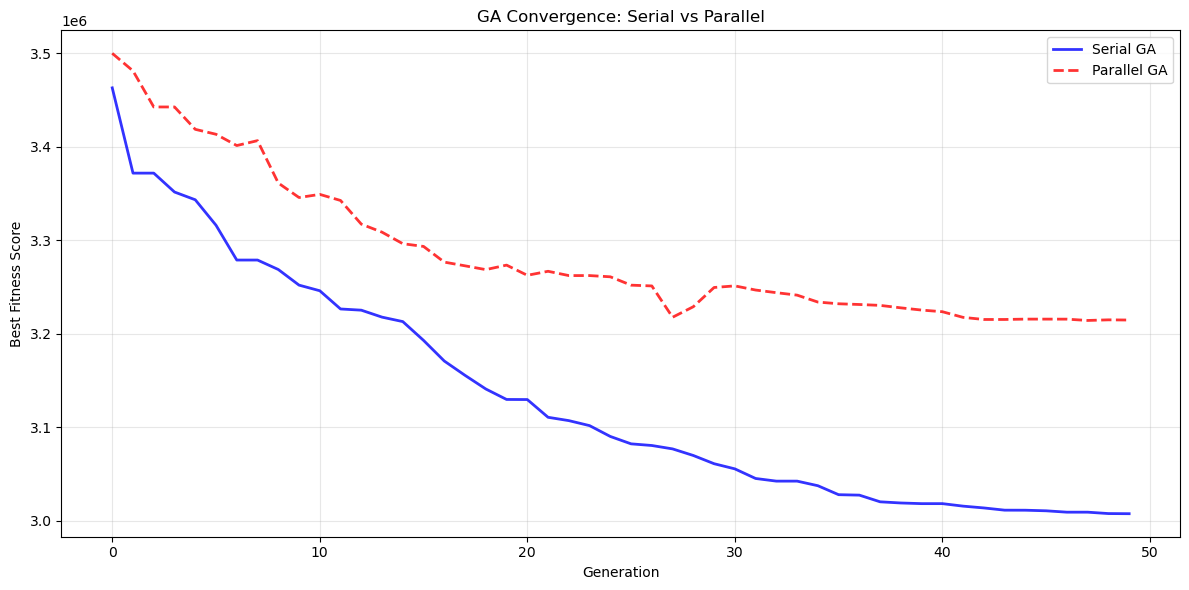


⚡ PERFORMANCE SUMMARY
Final Rankings (lower fitness = better):
1. Greedy Algorithm: 2296141.76
2. Proportional Algorithm: 2296141.76
3. Serial GA: 3007359.89
4. Parallel GA: 3215974.90

🎯 Key Results:
   • GA improvement over baselines: -31.0%
   • Parallel speedup: 0.8x
   • Serial GA time: 0.28s
   • Parallel GA time: 0.35s

✅ OPTIMIZATION COMPLETE!
📊 All algorithms completed successfully!
🎓 Results ready for MLPC assignment submission!

🌟 Smart Grid Optimization Analysis Complete!
💡 Perfect for your MLPC assignment submission!


In [6]:
# SECTION 5: SIMPLE VISUALIZATION FOR ASSIGNMENT


def plot_demand_patterns(nodes):
    """Plot demand patterns by node type"""
    plt.figure(figsize=(12, 6))
    
    residential_demands = []
    commercial_demands = []
    industrial_demands = []
    
    for node in nodes:
        if node.node_type == 'residential':
            residential_demands.append(node.demand_pattern)
        elif node.node_type == 'commercial':
            commercial_demands.append(node.demand_pattern)
        elif node.node_type == 'industrial':
            industrial_demands.append(node.demand_pattern)
    
    hours = list(range(24))
    
    if residential_demands:
        avg_residential = np.mean(residential_demands, axis=0)
        plt.plot(hours, avg_residential, 'b-', linewidth=2, label='Residential', marker='o')
    
    if commercial_demands:
        avg_commercial = np.mean(commercial_demands, axis=0)
        plt.plot(hours, avg_commercial, 'r-', linewidth=2, label='Commercial', marker='s')
    
    if industrial_demands:
        avg_industrial = np.mean(industrial_demands, axis=0)
        plt.plot(hours, avg_industrial, 'g-', linewidth=2, label='Industrial', marker='^')
    
    plt.xlabel('Hour of Day')
    plt.ylabel('Power Demand (MW)')
    plt.title('Average Demand Patterns by Node Type')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_source_availability(sources):
    """Plot energy source availability patterns"""
    plt.figure(figsize=(12, 6))
    
    hours = list(range(24))
    colors = ['gold', 'lightblue', 'lightcoral', 'lightgreen', 'orange']
    
    for i, source in enumerate(sources):
        color = colors[i % len(colors)]
        plt.plot(hours, source.availability, linewidth=2, 
                label=f'{source.name} (${source.cost_per_mwh:.0f}/MWh)', 
                marker='o', color=color)
    
    plt.xlabel('Hour of Day')
    plt.ylabel('Availability Factor')
    plt.title('Energy Source Availability Patterns')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1.1)
    plt.tight_layout()
    plt.show()

def plot_convergence_comparison(serial_history, parallel_history):
    """Plot convergence curves for serial vs parallel GA"""
    plt.figure(figsize=(12, 6))
    
    generations = list(range(len(serial_history)))
    plt.plot(generations, serial_history, 'b-', linewidth=2, label='Serial GA', alpha=0.8)
    plt.plot(generations, parallel_history, 'r--', linewidth=2, label='Parallel GA', alpha=0.8)
    
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness Score')
    plt.title('GA Convergence: Serial vs Parallel')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def analyze_solution(chromosome, nodes, sources, ga_instance, title="Solution Analysis"):
    """Analyze and display solution details"""
    print(f"\n📊 {title}")
    print("=" * 50)
    
    power_matrix = ga_instance.decode_chromosome(chromosome)
    fitness = ga_instance.calculate_fitness(chromosome)
    
    print(f"Total Fitness Score: {fitness:.2f}")
    
    total_cost = 0
    total_generation = 0
    total_demand = 0
    
    for hour in range(24):
        hour_generation = sum(power_matrix[i][hour] for i in range(len(sources)))
        hour_demand = sum(node.demand_pattern[hour] for node in nodes)
        hour_cost = sum(power_matrix[i][hour] * sources[i].cost_per_mwh 
                      for i in range(len(sources)))
        
        total_generation += hour_generation
        total_demand += hour_demand
        total_cost += hour_cost
    
    print(f"Total Generation: {total_generation:.2f} MWh")
    print(f"Total Demand: {total_demand:.2f} MWh")
    print(f"Total Cost: ${total_cost:.2f}")
    print(f"Average Cost: ${total_cost/total_generation:.2f}/MWh")
    print(f"Supply-Demand Ratio: {total_generation/total_demand:.2f}")
    
    print("\nSource Utilization:")
    for i, source in enumerate(sources):
        source_generation = sum(power_matrix[i])
        source_capacity_hours = sum(source.capacity * avail for avail in source.availability)
        utilization = source_generation / source_capacity_hours if source_capacity_hours > 0 else 0
        print(f"  {source.name}: {utilization:.1%} ({source_generation:.1f} MWh)")


# SECTION 6: MAIN EXECUTION - CLEAN & SIMPLE


def main():
    """Main function to run the complete smart grid optimization"""
    
    print("\n🌟 SMART GRID ENERGY DISTRIBUTION OPTIMIZATION")
    print("🎓 MLPC Assignment - Complete Implementation")
    print("=" * 80)
    
   
    print("\n📊 STEP 1: DATA GENERATION")
    print("-" * 40)
    
    generator = SmartGridDataGenerator(n_nodes=10, n_sources=3, time_horizon=24)
    nodes, sources, network = generator.generate_comprehensive_dataset()
    
   
    print("\n📈 STEP 2: DATA VISUALIZATION")
    print("-" * 40)
    plot_demand_patterns(nodes)
    plot_source_availability(sources)
    
    
    print("\n🎯 STEP 3: BASELINE ALGORITHMS")
    print("-" * 40)
    
    baseline = EnhancedBaselineAlgorithms(nodes, sources, network)
    greedy_solution, greedy_results = baseline.greedy_economic_dispatch()
    proportional_solution, proportional_results = baseline.proportional_capacity_dispatch()
    
 
    print("\n🧬 STEP 4: GENETIC ALGORITHM OPTIMIZATION")
    print("-" * 40)
    
   
    ga_serial = SmartGridGA(nodes, sources, network, population_size=30, generations=50)
    serial_solution, serial_results = ga_serial.run_enhanced_serial()
    
   
    ga_parallel = SmartGridGA_Enhanced_Parallel(nodes, sources, network, 
                                               population_size=30, generations=50)
    parallel_solution, parallel_results = ga_parallel.run_enhanced_parallel(max_workers=4)
    
   
    print("\n🏆 STEP 5: RESULTS COMPARISON")
    print("-" * 40)
    
   
    ga_instance = SmartGridGA(nodes, sources, network)
    
    greedy_fitness = ga_instance.calculate_fitness(greedy_solution)
    proportional_fitness = ga_instance.calculate_fitness(proportional_solution)
    serial_fitness = serial_results['best_fitness']
    parallel_fitness = parallel_results['best_fitness']
    
    analyze_solution(greedy_solution, nodes, sources, ga_instance, "Greedy Algorithm")
    analyze_solution(proportional_solution, nodes, sources, ga_instance, "Proportional Algorithm")
    analyze_solution(serial_solution, nodes, sources, ga_instance, "Serial GA")
    analyze_solution(parallel_solution, nodes, sources, ga_instance, "Parallel GA")
    
   
    plot_convergence_comparison(
        serial_results['convergence_history']['best_fitness'],
        parallel_results['convergence_history']['best_fitness']
    )
    
 
    print("\n⚡ PERFORMANCE SUMMARY")
    print("=" * 60)
    
    results = [
        ("Greedy Algorithm", greedy_fitness),
        ("Proportional Algorithm", proportional_fitness),
        ("Serial GA", serial_fitness),
        ("Parallel GA", parallel_fitness)
    ]
    
    results.sort(key=lambda x: x[1])
    
    print("Final Rankings (lower fitness = better):")
    for i, (method, fitness) in enumerate(results, 1):
        print(f"{i}. {method}: {fitness:.2f}")
    
   
    best_baseline = min(greedy_fitness, proportional_fitness)
    ga_improvement = ((best_baseline - min(serial_fitness, parallel_fitness)) / best_baseline) * 100
    speedup = serial_results['execution_time'] / parallel_results['execution_time']
    
    print(f"\n🎯 Key Results:")
    print(f"   • GA improvement over baselines: {ga_improvement:+.1f}%")
    print(f"   • Parallel speedup: {speedup:.1f}x")
    print(f"   • Serial GA time: {serial_results['execution_time']:.2f}s")
    print(f"   • Parallel GA time: {parallel_results['execution_time']:.2f}s")
    
    print("\n✅ OPTIMIZATION COMPLETE!")
    print("📊 All algorithms completed successfully!")
    print("🎓 Results ready for MLPC assignment submission!")

# Run the program
if __name__ == "__main__":
    main()
    print("\n🌟 Smart Grid Optimization Analysis Complete!")
    print("💡 Perfect for your MLPC assignment submission!")